<a href="https://colab.research.google.com/github/abdulaziz-ibrahim27/learning_new_language/blob/main/stack_overflow_survey_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Choosing the next programming language to learn




# Section 1: Business Understanding


## Brief Description
The goal of this project is know what programming language should be learned next based on a the objective of ***landing a new job***.

This objective will be achieved using an objective measure which is how many this job can pay me on average.

## Question 1: What are the most used programming languages?

## Question 2: What is the average pay for each of these languages

## Question 3: What jobs can I land using some of these programming languages



## Question 4: How can you learn one of these programming languages

# Section 2: Data Understanding 

## Access and Explore

### Collecting the intitial data

In [1]:
# import zipfile for extracting csv files
path = 'survey.zip' # use this if zipfile is on the same folder
from zipfile import ZipFile
with ZipFile(path, 'r') as zip_object:
  zip_object.extractall() # extract all files
  zip_object.close() # close the data stream

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Describe the data

In [3]:
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [5]:
df.shape # check out how many responses and questions are in the survey

(51392, 154)

In [6]:
schema.shape # check if the schema and survey aligns well

(154, 2)

In [7]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


It seems that the data and it's schema are both aligned, the schema is clean.

### Explore the data

In [9]:
# print all the column names to find some possible answers
for col in sorted(df.columns): # print columns in an ascending order using 
  print(col)                   # sorted()

AnnoyingUI
AssessJobCommute
AssessJobCompensation
AssessJobDept
AssessJobDiversity
AssessJobExp
AssessJobFinances
AssessJobIndustry
AssessJobLeaders
AssessJobOffice
AssessJobProduct
AssessJobProfDevel
AssessJobProjects
AssessJobRemote
AssessJobRole
AssessJobTech
AuditoryEnvironment
BoringDetails
BuildingThings
CareerSatisfaction
ChallengeMyself
ChangeWorld
CheckInCode
ClickyKeys
CollaborateRemote
CompanySize
CompanyType
CompetePeers
Country
CousinEducation
Currency
DeveloperType
DifficultCommunication
DiversityImportant
EducationImportant
EducationTypes
EmploymentStatus
EnjoyDebugging
EquipmentSatisfiedCPU
EquipmentSatisfiedMonitors
EquipmentSatisfiedRAM
EquipmentSatisfiedRW
EquipmentSatisfiedStorage
ExCoder10Years
ExCoderActive
ExCoderBalance
ExCoderBelonged
ExCoderNotForMe
ExCoderReturn
ExCoderSkills
ExCoderWillNotCode
ExpectedSalary
FormalEducation
FriendsDevelopers
Gender
HaveWorkedDatabase
HaveWorkedFramework
HaveWorkedLanguage
HaveWorkedPlatform
HighestEducationParents
HomeRemote

Printing all the column names should give me an estimate of how to find the answers to my questions, some interesting column names are:
* Salary
* DeveloperType
* NonDeveloperType
* SelfTaughtTypes
* HaveWorkedLanguage

In [10]:
# create a function to print a column's name description
def print_description(col_name):
  '''
  prints the description of each column using the data schema
  
  input:
          col_name: a column name from the survey
  output:
          None
  '''
  print(schema.loc[schema.Column == col_name].Question.values[0])

The function above should make printing the descriptions of the schema much easier

In [11]:
interesting_columns = [
    'Salary',
    'DeveloperType',
    'NonDeveloperType',
    'SelfTaughtTypes',
    'HaveWorkedLanguage'
]

for column in interesting_columns:
  print(f'{column}')
  print_description(column)
  print()


Salary
What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?

DeveloperType
Which of the following best describe you?

NonDeveloperType
Which of the following describe you?

SelfTaughtTypes
You indicated that you had taught yourself a programming technology without taking a course. What resources did you use to do that? If you've done it more than once, please think about the most recent time you've done so.

HaveWorkedLanguage
Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?



In [12]:
# lets sample some of columns in interest.
df['DeveloperType'].dropna().sample(5).values, df['NonDeveloperType'].dropna().sample(5).values

(array(['Desktop applications developer', 'Web developer; Other',
        'Web developer', 'Web developer', 'Web developer'], dtype=object),
 array(['Data scientist', 'Educator or academic', 'Analyst or consultant',
        'Analyst or consultant', 'Data scientist'], dtype=object))

In [13]:
df['SelfTaughtTypes'].dropna().sample(5)

22465    Official documentation; Trade book; Textbook; ...
7271     Official documentation; Trade book; Non-Stack ...
9906                 Trade book; Stack Overflow Q&A; Other
41650    Official documentation; Stack Overflow Q&A; No...
10737    Official documentation; Non-Stack online commu...
Name: SelfTaughtTypes, dtype: object

In [14]:
df['HaveWorkedLanguage'].dropna().sample(5)

817                           Assembly; C; C++; C#; Python
28381                                                  C++
40820                                     JavaScript; Ruby
16783                                   Clojure; Java; SQL
33667    Assembly; C; C++; Go; Haskell; Java; JavaScrip...
Name: HaveWorkedLanguage, dtype: object

* The Non/DeveloperType columns describe what job best fits the respondent

* SelfTaughtTypes describe how the respondent taugh themselve the language the use

* HaveWorkedLanguage is what language they used extensively. 


### Verify data quality
Verify the data quality by checking the values and how much missing data is there

In [15]:
# How many columns have missing data?
np.sum(df.isna().sum() > 0)

147

In [16]:
# list columns with missing data
list(df.columns[(df.isna().sum() > 0)])

['MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 '

Sample the data in order to understand if the data values have the correct types and if it's well formatted

In [17]:
# sample some colmns to get an understanding of the data values
df.sample(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
38866,38867,Professional developer,No,United States,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51252,51253,Student,"Yes, both",Italy,"Yes, full-time","Independent contractor, freelancer, or self-em...",Some college/university study without earning ...,"Information technology, networking, or system ...",About half the time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38115,38116,Professional developer,"Yes, I program as a hobby",France,No,Employed full-time,Master's degree,Computer science or software engineering,Never,100 to 499 employees,...,Strongly disagree,Male,A bachelor's degree,NaN,Agree,Agree,Disagree,Agree,NaN,NaN
26652,26653,Professional developer,"Yes, I contribute to open source projects",Uganda,No,"Independent contractor, freelancer, or self-em...",Bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28454,28455,Professional developer,"Yes, both",India,I prefer not to say,Employed full-time,Bachelor's degree,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data seems to be clean and well formatted the only issue is there are some missing values and that's it.

Let's check the severity of the missing data problem

In [18]:
# check how many missing values is there for each column as percentages
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

ExCoder10Years        0.982157
ExCoderNotForMe       0.982079
ExCoderWillNotCode    0.982059
ExCoderBalance        0.982040
ExCoderReturn         0.982040
                        ...   
EmploymentStatus      0.000000
FormalEducation       0.000000
Professional          0.000000
ProgramHobby          0.000000
Respondent            0.000000
Length: 154, dtype: float64

In [19]:
# average missing value
(df.isna().sum() / df.shape[0]).sort_values(ascending=False).mean()

0.45322014341511535

The data suffers from a lot of missing values, we will see if the columns has enough reponses to answer the questions

# Section 3: Data Preperation

### Selecting the columns of interest


The following columns are enough to answer my questions:
* Salary
* DeveloperType
* NonDeveloperType
* SelfTaughtTypes
* HaveWorkedLanguage

In [20]:
# selecting the columns
columns_of_interest = [
    'Salary',
    'DeveloperType',
    'NonDeveloperType',
    'SelfTaughtTypes',
    'HaveWorkedLanguage'
]

df_columns_of_interest = df.loc[:, columns_of_interest]
df_columns_of_interest.head()

,Salary,DeveloperType,NonDeveloperType,SelfTaughtTypes,HaveWorkedLanguage
0,NaN,NaN,NaN,NaN,Swift
1,NaN,NaN,NaN,Official documentation; Stack Overflow Q&A; Other,JavaScript; Python; Ruby; SQL
2,113750.0,Other,NaN,Official documentation; Trade book; Textbook; ...,Java; PHP; Python
3,NaN,NaN,Data scientist,NaN,Matlab; Python; R; SQL
4,NaN,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN


### Cleaning the data
Let's check for the average missing data and pick the best approach

In [21]:
# check how many observations are there for each column
(df_columns_of_interest.shape[0] - df_columns_of_interest.isna().sum()).sort_values()

NonDeveloperType       4890
Salary                12891
SelfTaughtTypes       26735
DeveloperType         36125
HaveWorkedLanguage    36625
dtype: int64

Since there is at least 5000 responses for the NonDeveloperType, that should suffice.
Dropping the NaN values will be a good approach.

In [22]:
df.dropna()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary


Applying drop on the whole dataframe is really extreme, therefore I will apply drop na values while im analyzing a specific column, like the column below.

In [23]:
df_columns_of_interest['NonDeveloperType'].dropna()

3                                Data scientist
6                                Data scientist
10                                        Other
28           C-suite executive; Product manager
29                                        Other
                          ...                  
51338    Product manager; Analyst or consultant
51339                                     Other
51342                                     Other
51381                            Data scientist
51391                                     Other
Name: NonDeveloperType, Length: 4890, dtype: object

# Section 4: Evaluation

### Question 1: What are the most used programming languages

In order to answer my question of _what programming language should I learn next_ it's a good starting point to see what are the most popular programming languages according to the survey

### Analyze

Let's first sample the `HaveWorkedLanguage` column.

In [24]:
df_columns_of_interest['NonDeveloperType'].dropna().head(5)

3                         Data scientist
6                         Data scientist
10                                 Other
28    C-suite executive; Product manager
29                                 Other
Name: NonDeveloperType, dtype: object

We can see some jobs are delimited with a semi-colon so we can't use `value_counts` in order to obtain my answer.

We are going to use a more manual approach to the processing.

In [25]:
# import the Counter object
from collections import Counter
language_counter = Counter()

no_nan_languages = df_columns_of_interest['HaveWorkedLanguage'].dropna() # drop NaN values
no_nan_languages.apply(lambda col: language_counter.update(col.split(';'))) # split the value with the delimiter

# print results
for language, count in language_counter.most_common(5):
  print(f'{language}:\n {count}\n')

 SQL:
 18466

 JavaScript:
 17159

 Python:
 10719

 PHP:
 9765

 Java:
 8622



### Visualize

In [26]:
# make a dataframe for plotting
df_top_languages = pd.DataFrame(language_counter.most_common(5), columns=['Language', 'Frequency'])
df_top_languages = df_top_languages.set_index('Language')
df_top_languages.head()

,Frequency
Language,
SQL,18466
JavaScript,17159
Python,10719
PHP,9765
Java,8622


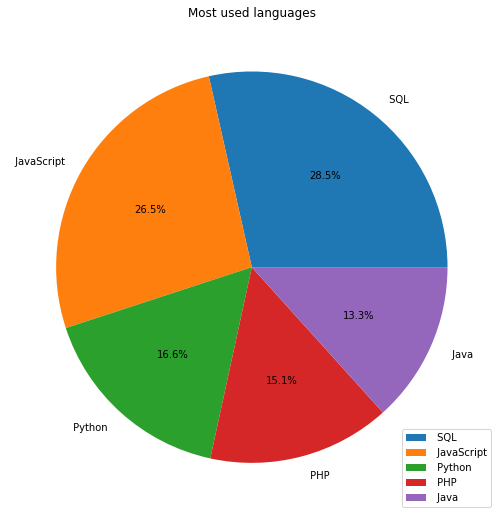

In [27]:
# plot using pandas in built plot method
df_top_languages.plot(kind='pie', y='Frequency', figsize=(12, 9), autopct='%1.1f%%')
plt.title('Most used languages')
plt.ylabel(None)
plt.savefig('pie_chart.png')
plt.show()

### Explanation

From the pie chart we interestingly see that SQL was the most used language according to the survey, the answer could be be that SQL is the primary language for handling databases therefore it's the most used language.

databases and website come together as a pair so it would make sense for javascript to come second.

Python is a general purpose language more than java so it make sense to see it more used.

JS, PY, SQL can be intially a good choice but we need to expand more on this answer.

## Question 2: What is the average pay for each of these Languages?

After knowing what are the most used programming languages according to my objective measure now its time to calculate the average pay for these languages.

### Analyze

In [28]:
lang_list = [x[0].strip() for x in language_counter.most_common(5)] # remove whitespaces from the languages
                                                                    # since it interferes with the result.
temp_list = [] # list for appending names of the top most used langauges
for language in lang_list: # make a dict for constructing a dataframe
  temp_list.append(
      {
          'language': language,
          'average_salary': df_columns_of_interest.query('@language in HaveWorkedLanguage')['Salary'].mean()
      }
  )
df_average_salary = pd.DataFrame(temp_list) # dataframe for plotting

df_average_salary = df_average_salary.set_index('language') # set index for easier plotting

### Visualize

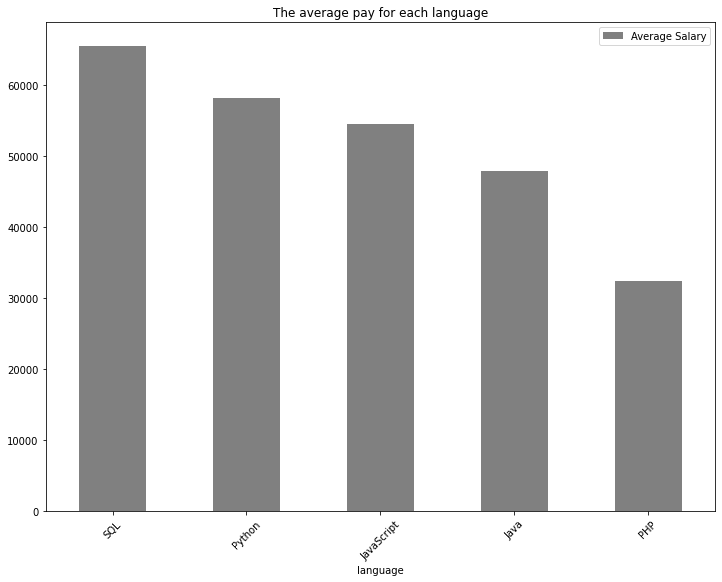

In [29]:
# build plot and clean it
df_average_salary.sort_values('average_salary', ascending=False).plot(kind='bar', figsize=(12, 9), color=['grey'])
plt.xticks(rotation=45)
plt.title('The average pay for each language')
plt.legend(['Average Salary'])
plt.savefig('bar_chart')
plt.show()

### Explanation

SQL is still leading in the average salary because of the importance of databases, but python came out on top of javascript because it has more use cases, javascript is prodominantly used in web development. 

## Question 3: What jobs can I land using some of these programming languages

Knowing what jobs what I can land it helps knowing what programming language should I pick next but this has to consequences, first is that this is subjective, second it requires exploration of what each job is.

### Analyze

I will use a similar approach that's used in the first question, in the next two questions because all of them have the same idea of displaying the top answers

In [30]:
job_counter = Counter() # counter object to count the jobs

lang = 'SQL'
df_sql_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage') # fetch only the SQL rows

no_nan_devtype = df_sql_users['DeveloperType'].dropna() 
no_nan_nondevtype = df_sql_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';'))) # split by ';' and add to counter
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';'))) # split by ';' and add to counter

sql_job_list = [job[0] for job in job_counter.most_common(5)] # a comprehension list to fetch the job something like this ['job1', 'job2' ...]

In [31]:
job_counter = Counter() # same but for python

lang = 'Python'
df_python_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage')

no_nan_devtype = df_python_users['DeveloperType'].dropna()
no_nan_nondevtype = df_python_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';')))
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';')))

py_job_list = [job[0] for job in job_counter.most_common(5)]

In [32]:
job_counter = Counter() # same but for javascript

lang = 'JavaScript'
df_javascript_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage')

no_nan_devtype = df_javascript_users['DeveloperType'].dropna()
no_nan_nondevtype = df_javascript_users['NonDeveloperType'].dropna()

no_nan_devtype.apply(lambda col: job_counter.update(col.split(';')))
no_nan_nondevtype.apply(lambda col: job_counter.update(col.split(';')))

js_job_list = [job[0] for job in job_counter.most_common(5)]

### Visualize

In [33]:
# clean the strings, format them and display the top jobs for each programming language.
job_lists = [(sql_job_list, 'SQL'), (py_job_list, 'Python'), (js_job_list, 'JavaScript')]
for job_list, language in job_lists:
  print(f'{language}:')
  for job in job_list:
    if job.split(' ')[0] == 'Other':
      pass
    else:
      print('  '+job.strip())
  print()

SQL:
  Database administrator
  Desktop applications developer
  Desktop applications developer
  Analyst or consultant

Python:
  Web developer
  Analyst or consultant
  Data scientist
  DevOps specialist

JavaScript:
  Web developer
  Mobile developer
  Graphic designer
  Desktop applications developer
  DevOps specialist



### Explanation

Interestingly enough, we can see that there is an intersection between the languages this suggests that we might need to learn multiple languages to land a job, The jobs where 2 languages intersect seem like an interesting choice.

Speaking of learning

## Question 4: How can you learn one of these programming languages?

After knowing the knowing the language according the job I picked, how can I learn this language? what is the best way to do so?

### Analyze

In [34]:
resource_counter = Counter() # the same process is applied here for finding the top used resources for learning a language

lang = 'SQL' # select the language
df_sql_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage') # fetch the SQL rows

no_nan_resource = df_sql_users['SelfTaughtTypes'].dropna() # dropna for counting
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';'))) # count each response and add it to counter

sql_resource_list = [resource[0] for resource in resource_counter.most_common(5)] # comprehension list for resources something like this ['resource1', 'resource2', ...]

In [35]:
resource_counter = Counter()

lang = 'Python'
df_python_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage')

no_nan_resource = df_python_users['SelfTaughtTypes'].dropna()
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';')))

py_resource_list = [resource[0] for resource in resource_counter.most_common(5)]

In [36]:
resource_counter = Counter()

lang = 'JavaScript'
df_javascript_users = df_columns_of_interest.query('@lang in HaveWorkedLanguage')

no_nan_resource = df_javascript_users['SelfTaughtTypes'].dropna()
no_nan_resource.apply(lambda col: resource_counter.update(col.split(';')))

js_resource_list = [resource[0] for resource in resource_counter.most_common(5)]

### Visualize

In [37]:
# clean the strings, format them and display the top used resources.
resource_lists = [(sql_resource_list, 'SQL'), (py_resource_list, 'Python'), (js_resource_list, 'JavaScript')]
for resource_list, language in resource_lists:
  print(f'{language}:')
  for resource in resource_list:
    if resource.split(' ')[0] == 'Other':
      pass
    else:
      print('  '+resource.strip())
  print()


SQL:
  Official documentation
  Stack Overflow Q&A
  Built-in help
  Non-Stack online communities
  Trade book

Python:
  Official documentation
  Stack Overflow Q&A
  Built-in help
  Trade book
  Non-Stack online communities

JavaScript:
  Official documentation
  Stack Overflow Q&A
  Non-Stack online communities
  Built-in help
  Trade book



### Analyze

We can see that accross many languages some resources occur more than once, therefore a good choice for a learning source things like:
* Official Documentation
* Stack Overflow Q&A
* Non-Stack online communities 

In conclusion, after going through the analysis picking the next language should be one of the top 3 languages.

A post with the summary of the results:

https://medium.com/@abdulaziz.i.j/looking-for-a-new-programming-language-to-learn-7291b2dff9d